# Title: Forecasting time series

The objection of this experiment is to try to predict products sell with holtz winter and LST and compare the result from the models

# introduction

Nama Azriel Dzaki Ravideva

# External link

# Working Arena

In [1]:
#Load Library
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
import warnings
warnings.filterwarnings("ignore")

In [2]:
data= pd.read_csv('sample_dataset_timeseries_noarea.csv')
data

,week_number,week_start_date,week_end_date,product_item,quantity
0,2021-52,2021-12-27,2022-01-02,0073377087c7ddace313ff829cd7b0b3,41
1,2021-52,2021-12-27,2022-01-02,012d2bb142b2d5e57330acbfd8e9ac52,430
2,2021-52,2021-12-27,2022-01-02,0192926e33d1153b63511a5b83eca843,4
3,2021-52,2021-12-27,2022-01-02,019502f6d13e383caa9b9673bf1302f8,148
4,2021-52,2021-12-27,2022-01-02,01e7ca6d4e21badc1d4225b6b2c7bd9e,119
...,...,...,...,...,...
102728,2023-14,2023-04-03,2023-04-09,ff3890faa80ff425ae906e27bbc50bc6,907
102729,2023-14,2023-04-03,2023-04-09,ff4b0f3b9c78c91510a4e3920fbc5090,81
102730,2023-14,2023-04-03,2023-04-09,ff9d05a4d6f922b3ab1653f58165b8ce,16
102731,2023-14,2023-04-03,2023-04-09,ffbd6f1d884056a4f622d54ae79e5a14,42920


## EDA 

In [3]:
number= data['product_item'].nunique()
print('The number of products', number)

The number of products 2309


In [4]:
# menghitung berapa banyak kejadian pembelian setiap produk
value_counts= data['product_item'].value_counts()

#membuat tabel baru dengan hanya produk yang dibeli di seluruh minggu
tabel_baru = data.loc[data['product_item'].isin(value_counts[value_counts == 67].index)]

tabel_baru

,week_number,week_start_date,week_end_date,product_item,quantity
0,2021-52,2021-12-27,2022-01-02,0073377087c7ddace313ff829cd7b0b3,41
1,2021-52,2021-12-27,2022-01-02,012d2bb142b2d5e57330acbfd8e9ac52,430
2,2021-52,2021-12-27,2022-01-02,0192926e33d1153b63511a5b83eca843,4
3,2021-52,2021-12-27,2022-01-02,019502f6d13e383caa9b9673bf1302f8,148
4,2021-52,2021-12-27,2022-01-02,01e7ca6d4e21badc1d4225b6b2c7bd9e,119
...,...,...,...,...,...
102721,2023-14,2023-04-03,2023-04-09,fe2e9633313ef193495cc10e96a11ad0,1449
102723,2023-14,2023-04-03,2023-04-09,fe88080dd6a4387f1035c908d3ec26a5,4131
102725,2023-14,2023-04-03,2023-04-09,fed98e52dd33638523d6028c19c3a103,21872
102727,2023-14,2023-04-03,2023-04-09,ff24eb021c575c9a1dc709c3f8d6631a,436


Product item dengan total quantity terbanyak adalah: 2949ca4cfbf13969bccfbb9817f2526a


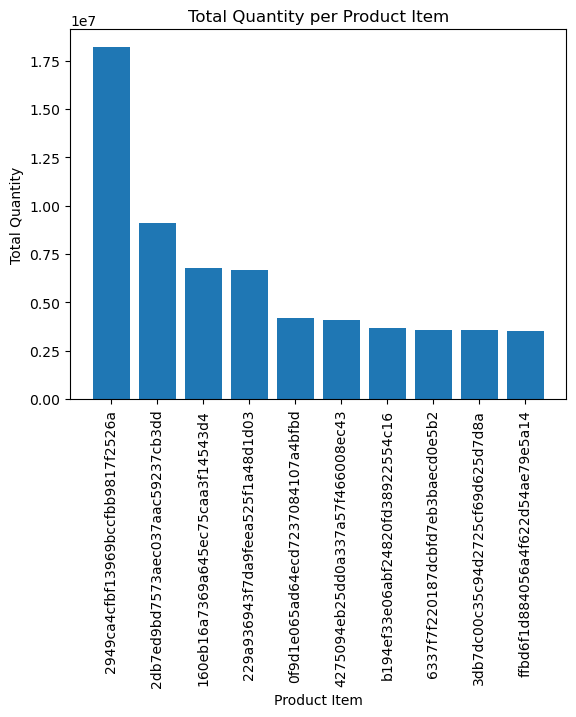

In [5]:
# Kelompokkan data berdasarkan product_item dan hitung total quantity
grouped_data = tabel_baru.groupby('product_item')['quantity'].sum()

# Urutkan data secara menurun berdasarkan total quantity
sorted_data = grouped_data.sort_values(ascending=False)

# Ambil product_item dengan total quantity terbanyak
top_product_item = sorted_data.index[0]

# Tampilkan hasil
print("Product item dengan total quantity terbanyak adalah:", top_product_item)

sorted_data2= sorted_data.head(10)

# Buat bar plot
plt.bar(sorted_data2.index, sorted_data2.values)
plt.title('Total Quantity per Product Item')
plt.xlabel('Product Item')
plt.ylabel('Total Quantity')
plt.xticks(rotation=90)
plt.show()

Graph above shows the ID of the most sold items

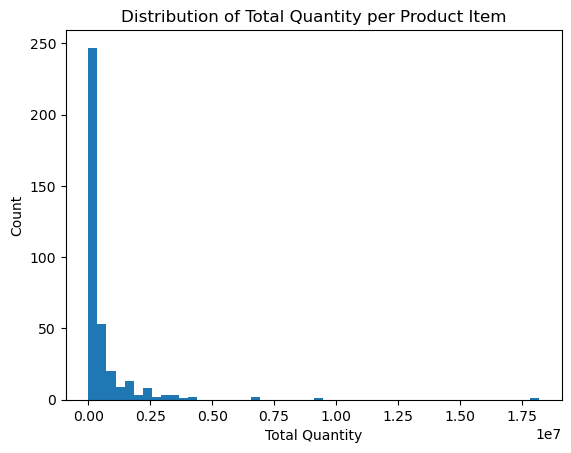

In [6]:
# Buat distribution chart
plt.hist(sorted_data, bins=50)
plt.title('Distribution of Total Quantity per Product Item')
plt.xlabel('Total Quantity')
plt.ylabel('Count')
plt.show()

graph above shows the distribution of the total product sold. the graph shows that the distribution is not of the normal distribution. normal distribution is more desireble form of data because its properties are well understood and there are many statistical methods available to analyze data from a normal distribution. This makes it easier to apply statistical tests and make conclusions based on the data.

In [7]:
#nama produk produk teratas
product_item_names = sorted_data2.index.tolist()
product_item_names

['2949ca4cfbf13969bccfbb9817f2526a',
 '2db7ed9bd7573aec037aac59237cb3dd',
 '160eb16a7369a645ec75caa3f14543d4',
 '229a936943f7da9feea525f1a48d1d03',
 '0f9d1e065ad64ecd7237084107a4bfbd',
 '4275094eb25dd0a337a57f466008ec43',
 'b194ef33e06abf24820fd38922554c16',
 '6337f7f220187dcbfd7eb3baecd0e5b2',
 '3db7dc00c35c94d2725cf69d625d7d8a',
 'ffbd6f1d884056a4f622d54ae79e5a14']

In [8]:
# Membuat table baru dengan hanya memuat produk teratas
new_data = data[data['product_item'].isin(product_item_names)]

# Cetak tabel baru
new_data


,week_number,week_start_date,week_end_date,product_item,quantity
28,2021-52,2021-12-27,2022-01-02,0f9d1e065ad64ecd7237084107a4bfbd,718
42,2021-52,2021-12-27,2022-01-02,160eb16a7369a645ec75caa3f14543d4,866
74,2021-52,2021-12-27,2022-01-02,229a936943f7da9feea525f1a48d1d03,1168
90,2021-52,2021-12-27,2022-01-02,2949ca4cfbf13969bccfbb9817f2526a,56851
97,2021-52,2021-12-27,2022-01-02,2db7ed9bd7573aec037aac59237cb3dd,4749
...,...,...,...,...,...
101627,2023-14,2023-04-03,2023-04-09,3db7dc00c35c94d2725cf69d625d7d8a,86125
101659,2023-14,2023-04-03,2023-04-09,4275094eb25dd0a337a57f466008ec43,76475
101852,2023-14,2023-04-03,2023-04-09,6337f7f220187dcbfd7eb3baecd0e5b2,40780
102271,2023-14,2023-04-03,2023-04-09,b194ef33e06abf24820fd38922554c16,43723


In [25]:
#menggunakan dictionary untuk menyimpan tabel dari setiap product
def table_generator(df, listname):
    name={}
    n= len(listname)
    for i in range(n):
       name[i]=df[df['product_item']==listname[i]]
    return name

name= table_generator(data, product_item_names)
name[9]
    

,week_number,week_start_date,week_end_date,product_item,quantity
449,2021-52,2021-12-27,2022-01-02,ffbd6f1d884056a4f622d54ae79e5a14,537
1948,2022-01,2022-01-03,2022-01-09,ffbd6f1d884056a4f622d54ae79e5a14,40975
3425,2022-02,2022-01-10,2022-01-16,ffbd6f1d884056a4f622d54ae79e5a14,47080
4905,2022-03,2022-01-17,2022-01-23,ffbd6f1d884056a4f622d54ae79e5a14,68171
6376,2022-04,2022-01-24,2022-01-30,ffbd6f1d884056a4f622d54ae79e5a14,112978
...,...,...,...,...,...
96735,2023-10,2023-03-06,2023-03-12,ffbd6f1d884056a4f622d54ae79e5a14,47735
98236,2023-11,2023-03-13,2023-03-19,ffbd6f1d884056a4f622d54ae79e5a14,63840
99716,2023-12,2023-03-20,2023-03-26,ffbd6f1d884056a4f622d54ae79e5a14,54501
101231,2023-13,2023-03-27,2023-04-02,ffbd6f1d884056a4f622d54ae79e5a14,66679


In [10]:
week= new_data.groupby('week_number')['quantity'].sum()
week

week_number
2021-52      66540
2022-01     686364
2022-02     675839
2022-03     720515
2022-04     942231
            ...   
2023-10     942297
2023-11     950256
2023-12     995693
2023-13    1240231
2023-14     753571
Name: quantity, Length: 67, dtype: int64

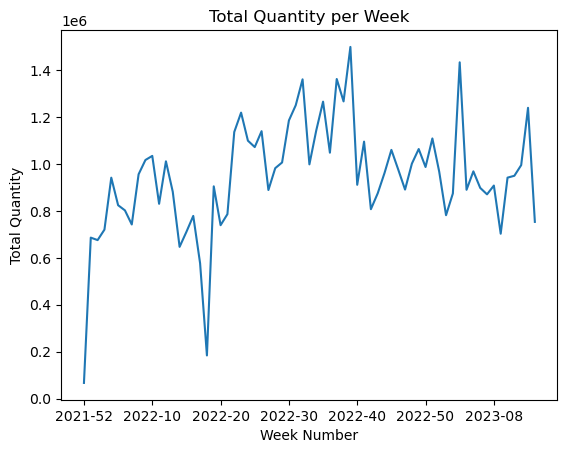

In [11]:
# Buat line plot
week.plot()
plt.title('Total Quantity per Week')
plt.xlabel('Week Number')
plt.ylabel('Total Quantity')
plt.show()

Graph above shows the sell of the top product from week to week

## Feature Engineering

In [12]:
# Ubah series menjadi dataframe
df = week.to_frame().reset_index()

# Ganti nama kolom dari indeks menjadi 'Week Number'
week = df.rename(columns={'index': 'Week Number'})

In [13]:
#splitting train and test
train=week[0:53] 
test=week[53:]

test.tail()

,week_number,quantity
62,2023-10,942297
63,2023-11,950256
64,2023-12,995693
65,2023-13,1240231
66,2023-14,753571


## Holts Winter

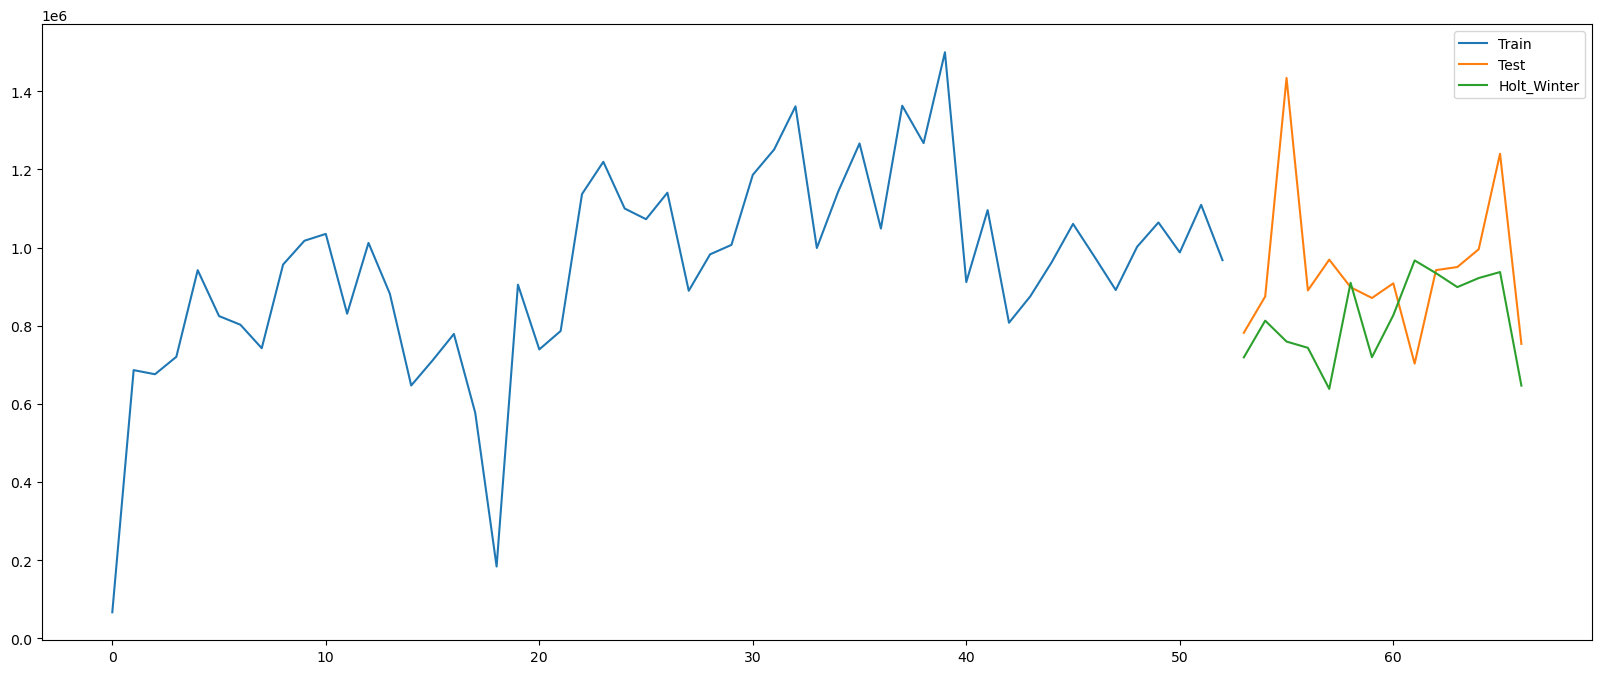

In [14]:
y_hat_avg = test.copy()
fit1 = ExponentialSmoothing(np.asarray(train['quantity']) ,seasonal_periods=13 ,trend='multiplicative', seasonal='multiplicative').fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(test))
plt.figure(figsize=(20,8))
plt.plot(train['quantity'], label='Train')
plt.plot(test['quantity'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

In [15]:
print("mae :", mean_absolute_error(test.quantity, y_hat_avg.Holt_Winter))
print("rmse :", sqrt(mean_squared_error(test.quantity, y_hat_avg.Holt_Winter)))

mae : 166336.79432301945
rmse : 239781.4979529572


In [16]:
def forecasting(x):
    predict= fit1.forecast(len(test)+x)
    predict= predict[-x:]
    rounded_arr = []
    for num in predict:
        rounded_num = round(num)
        rounded_arr.append(rounded_num)
    return rounded_arr

forecasting(4)

[731153, 683049, 668615, 574099]

In [17]:
def holtz_generator(df):
    df=df.drop(columns=['week_start_date','week_end_date','product_item'])
    n=0.8*len(df)
    n=round(n)
    #splitting train and test
    train=df.iloc[0:n] 
    test=df.iloc[n:]

    y_hat_avg = test
    fit1 = ExponentialSmoothing(np.asarray(train['quantity']) ,seasonal_periods=8 ,trend='multiplicative', seasonal='multiplicative').fit()
    y_hat_avg['Holt_Winter'] = fit1.forecast(len(test))
    plt.figure(figsize=(20,8))
    plt.plot(train['quantity'], label='Train')
    plt.plot(test['quantity'], label='Test')
    plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
    plt.legend(loc='best')
    plt.show()
        
    

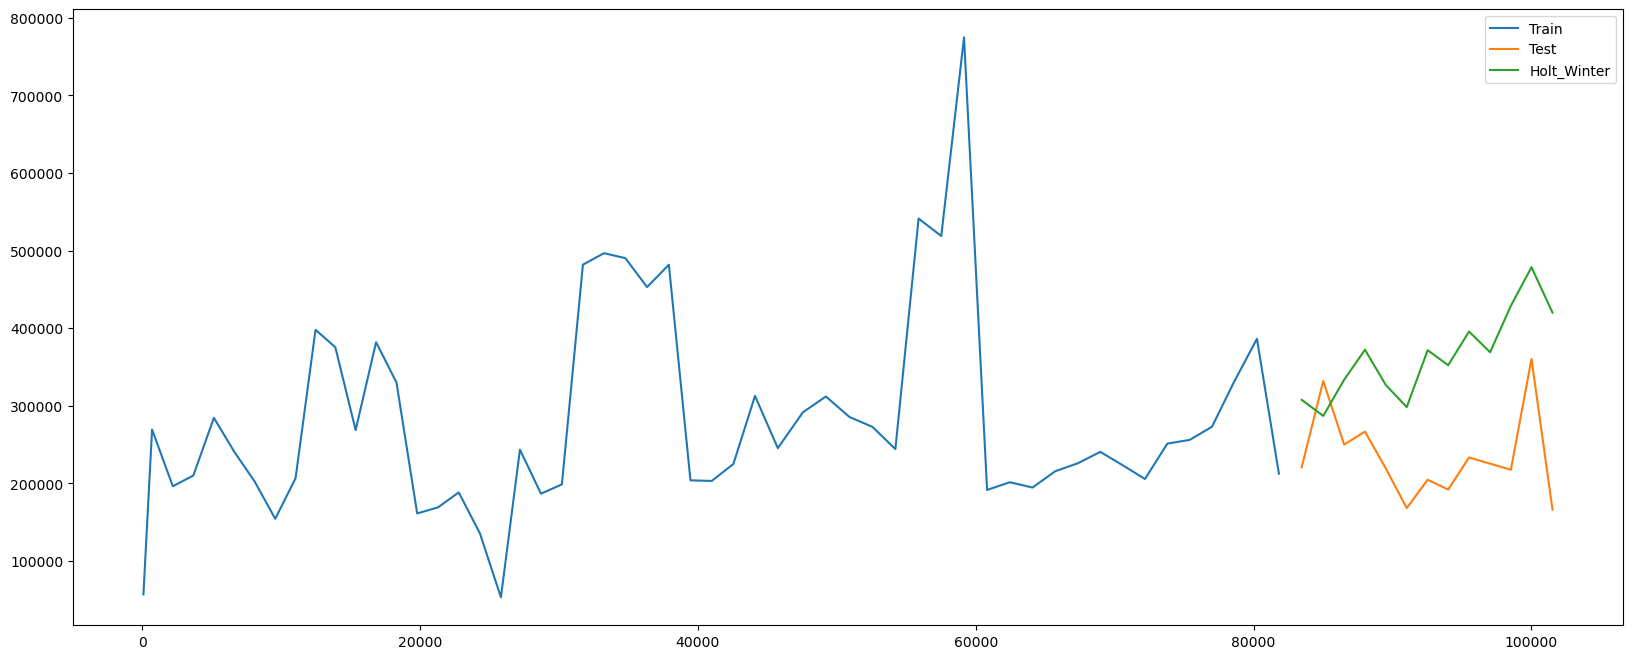

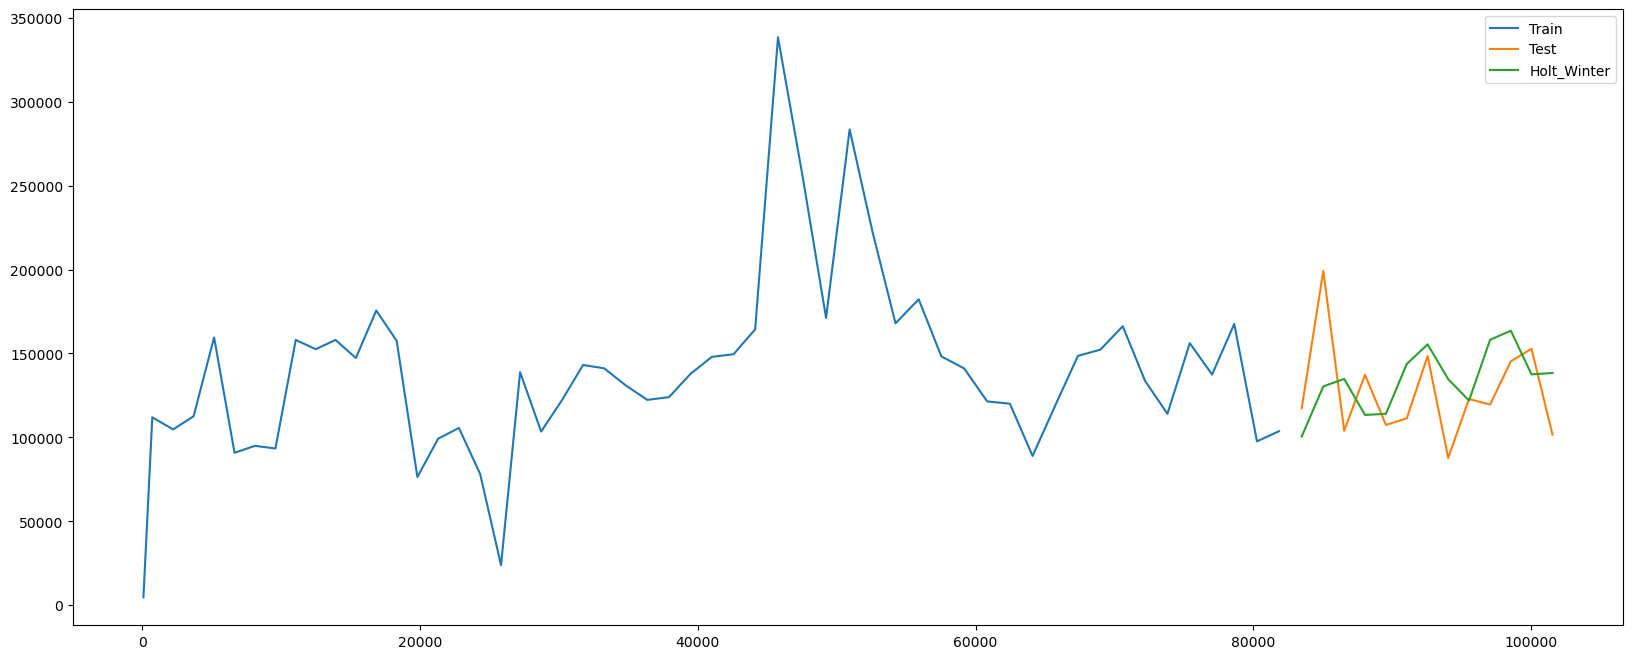

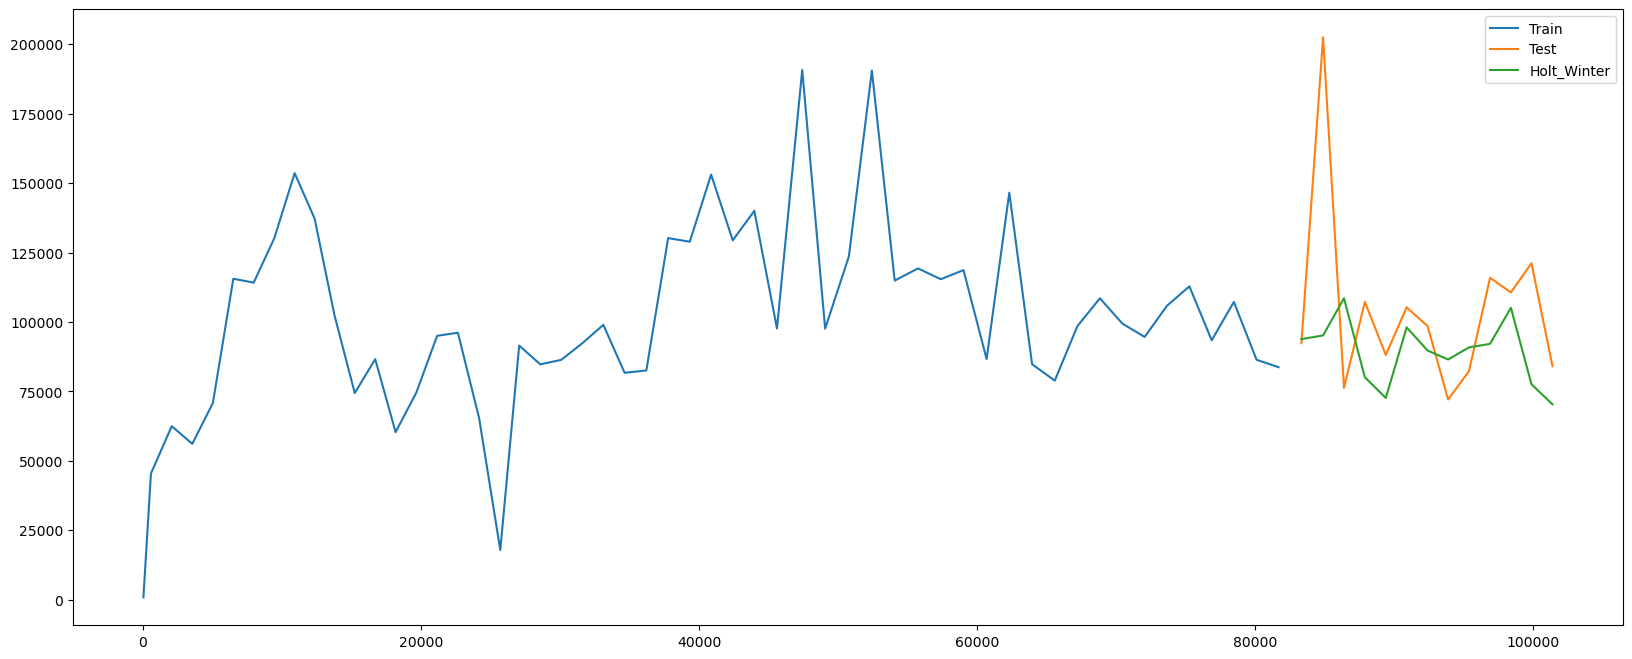

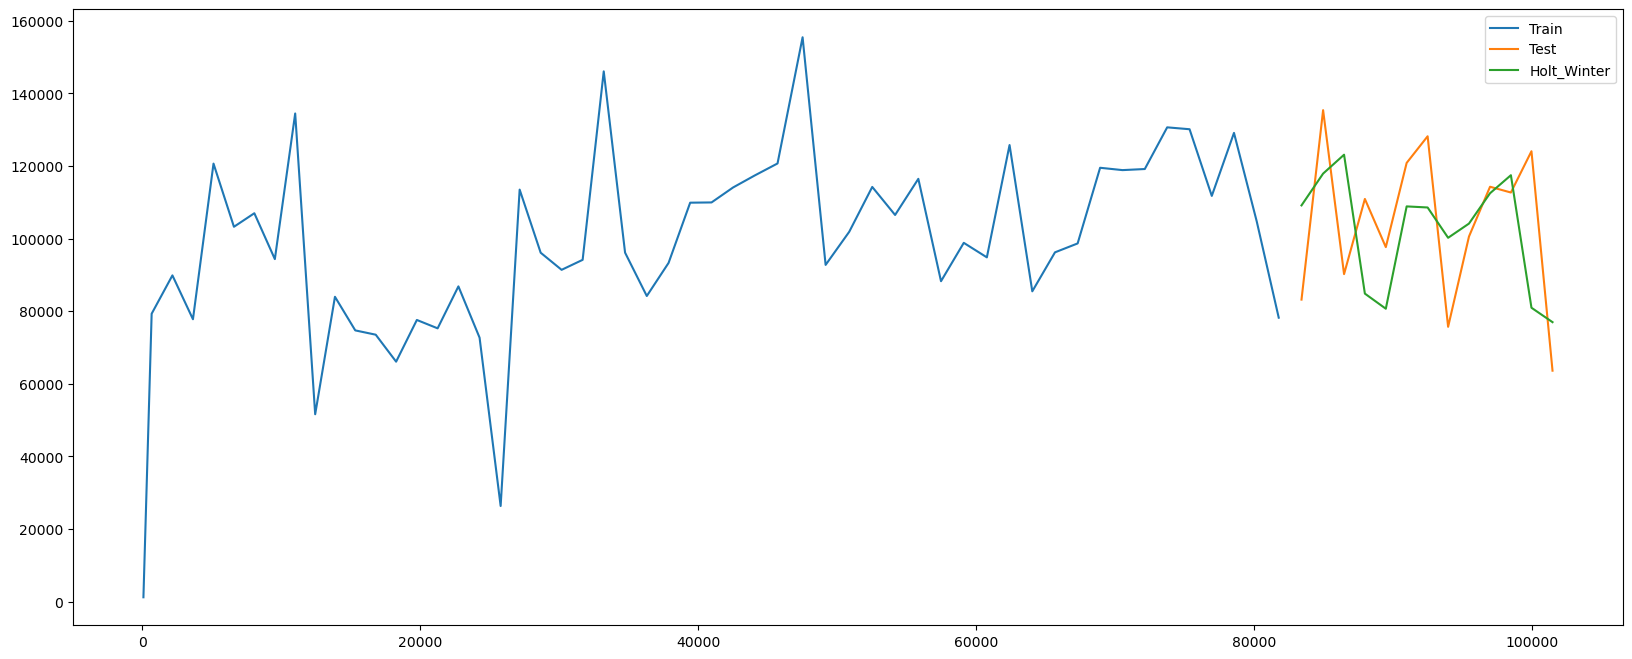

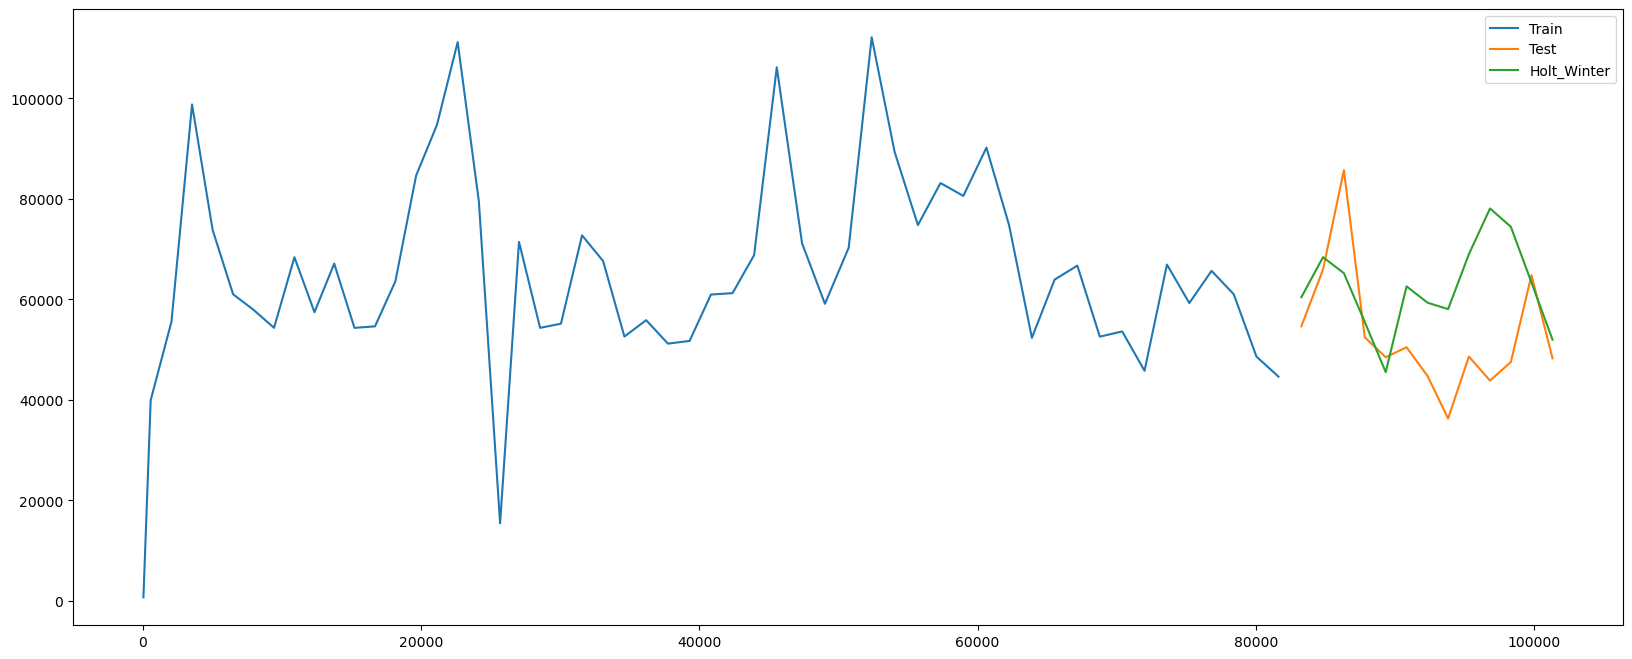

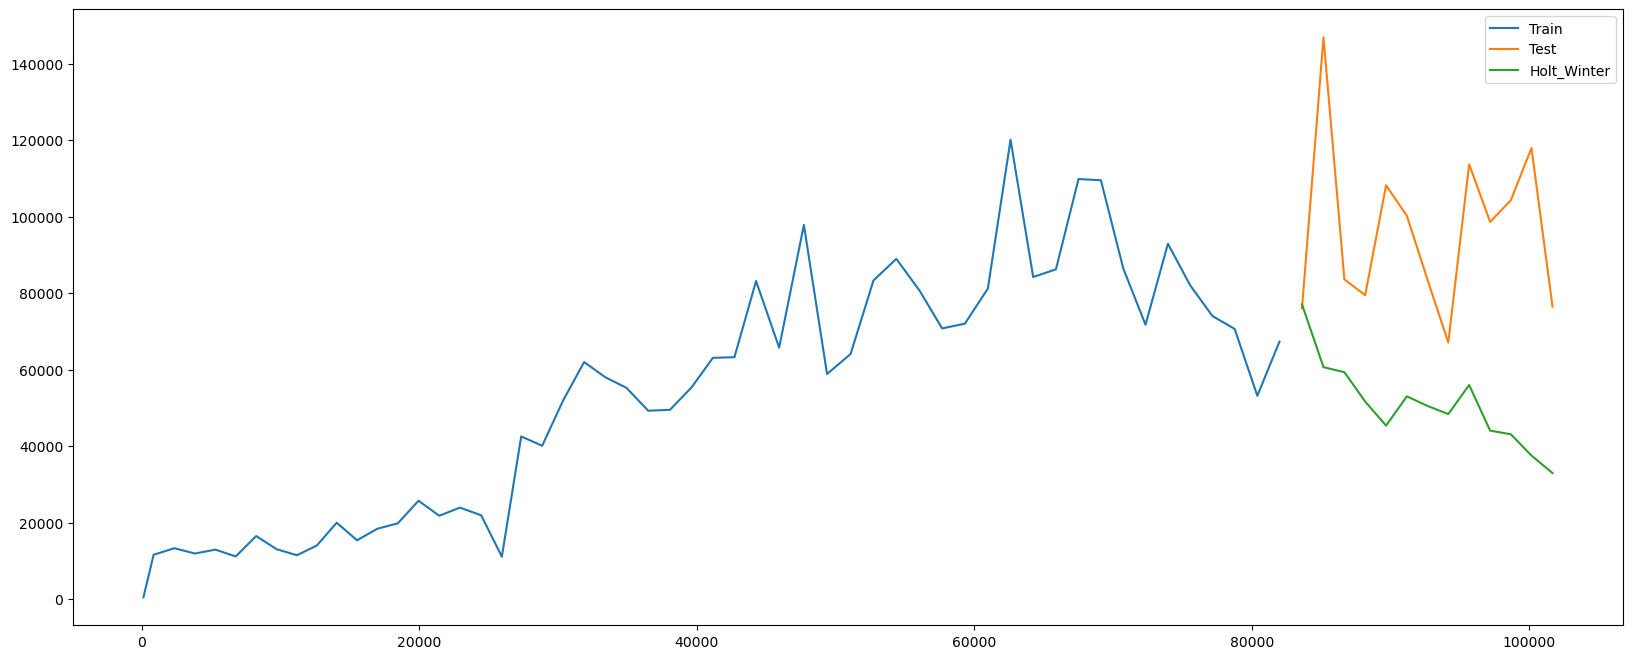

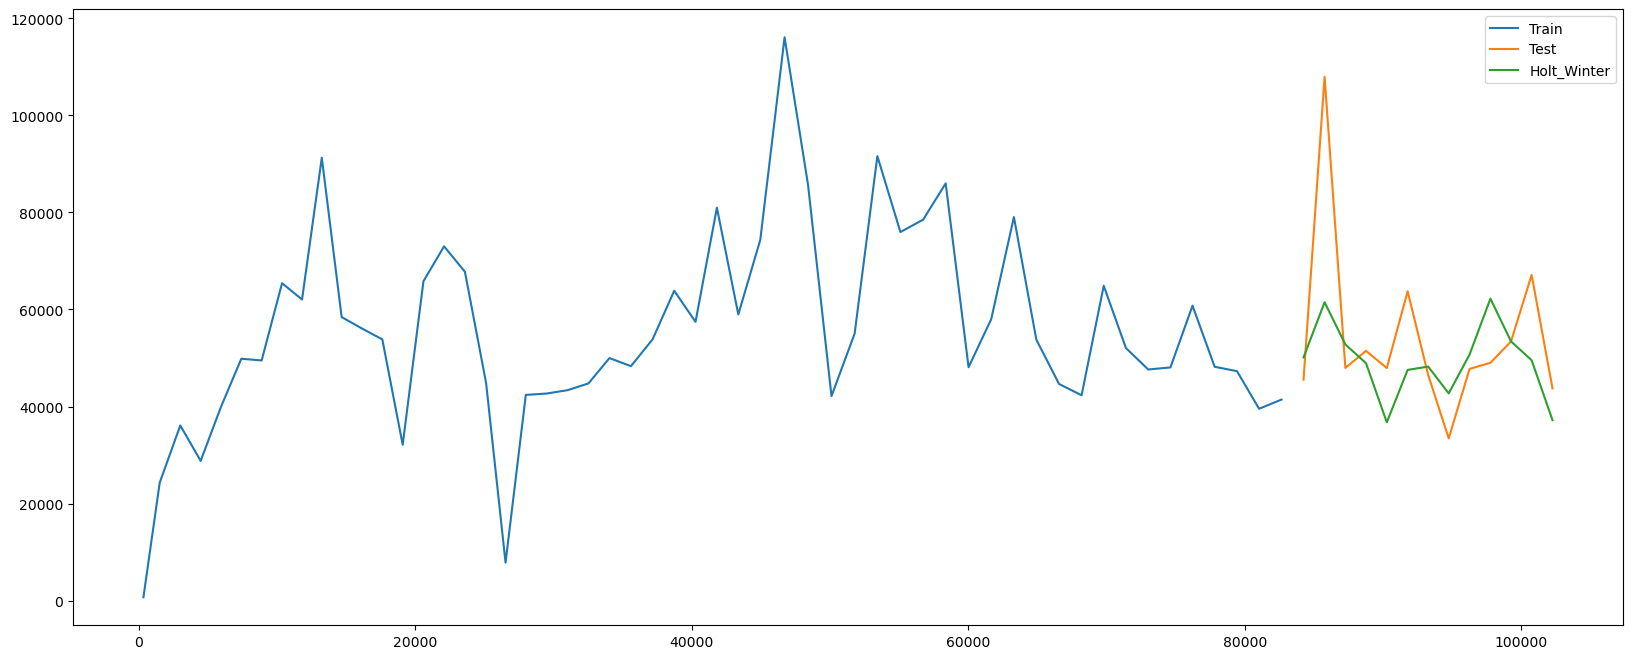

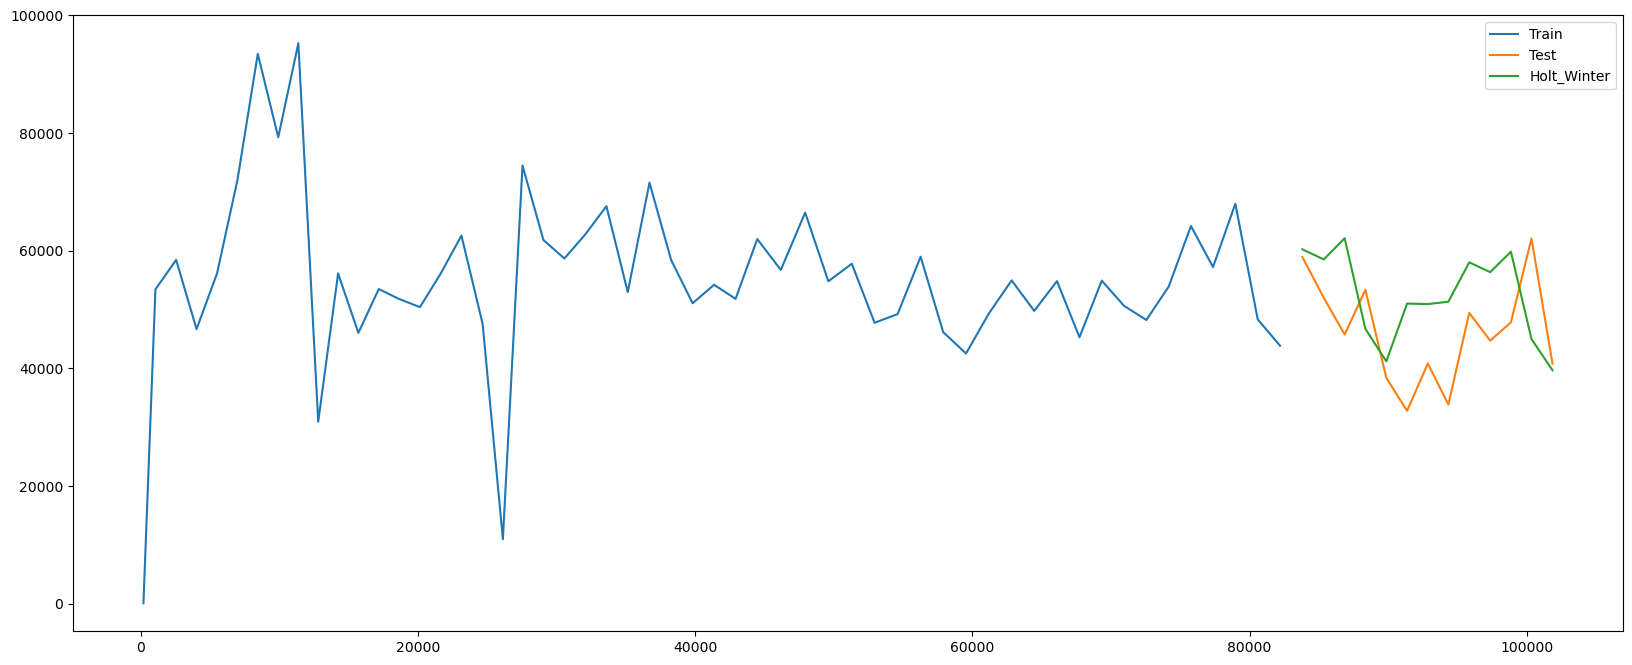

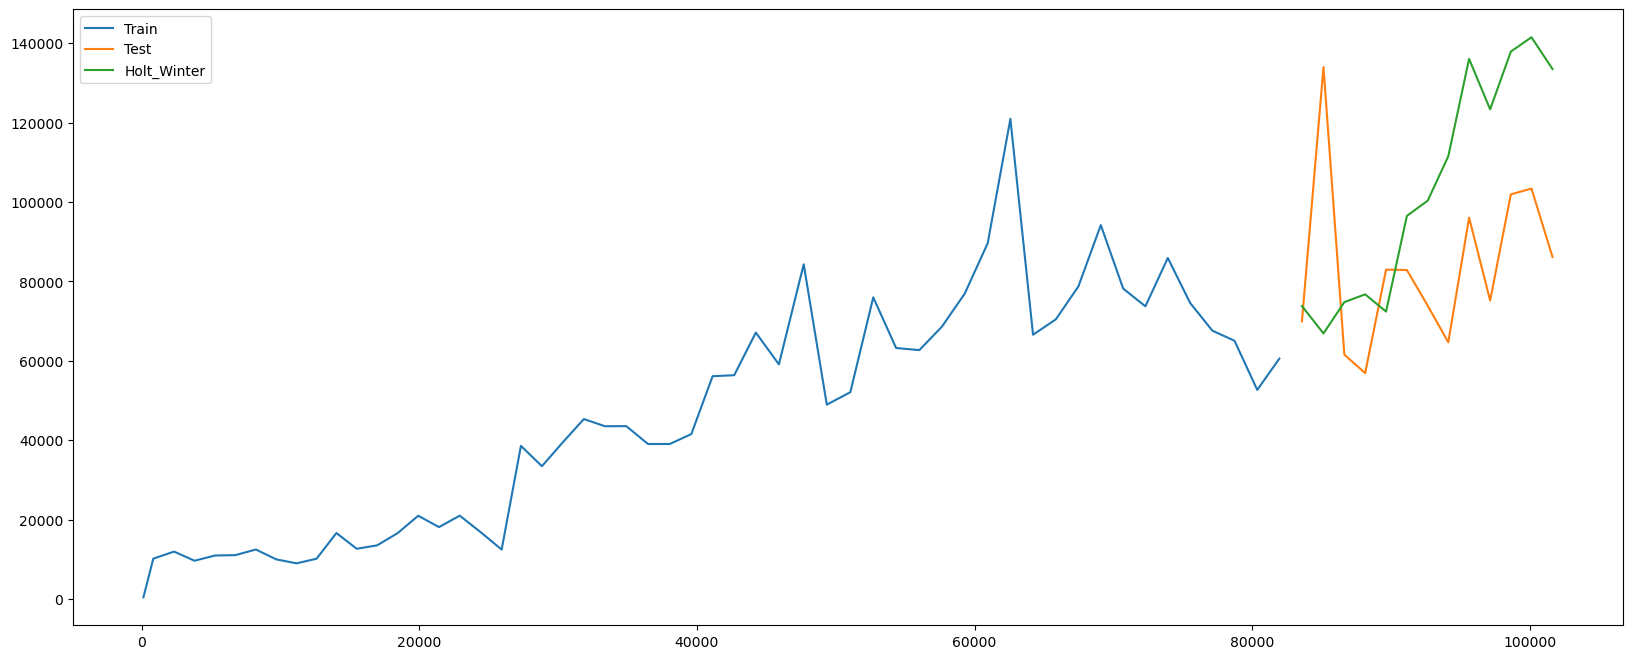

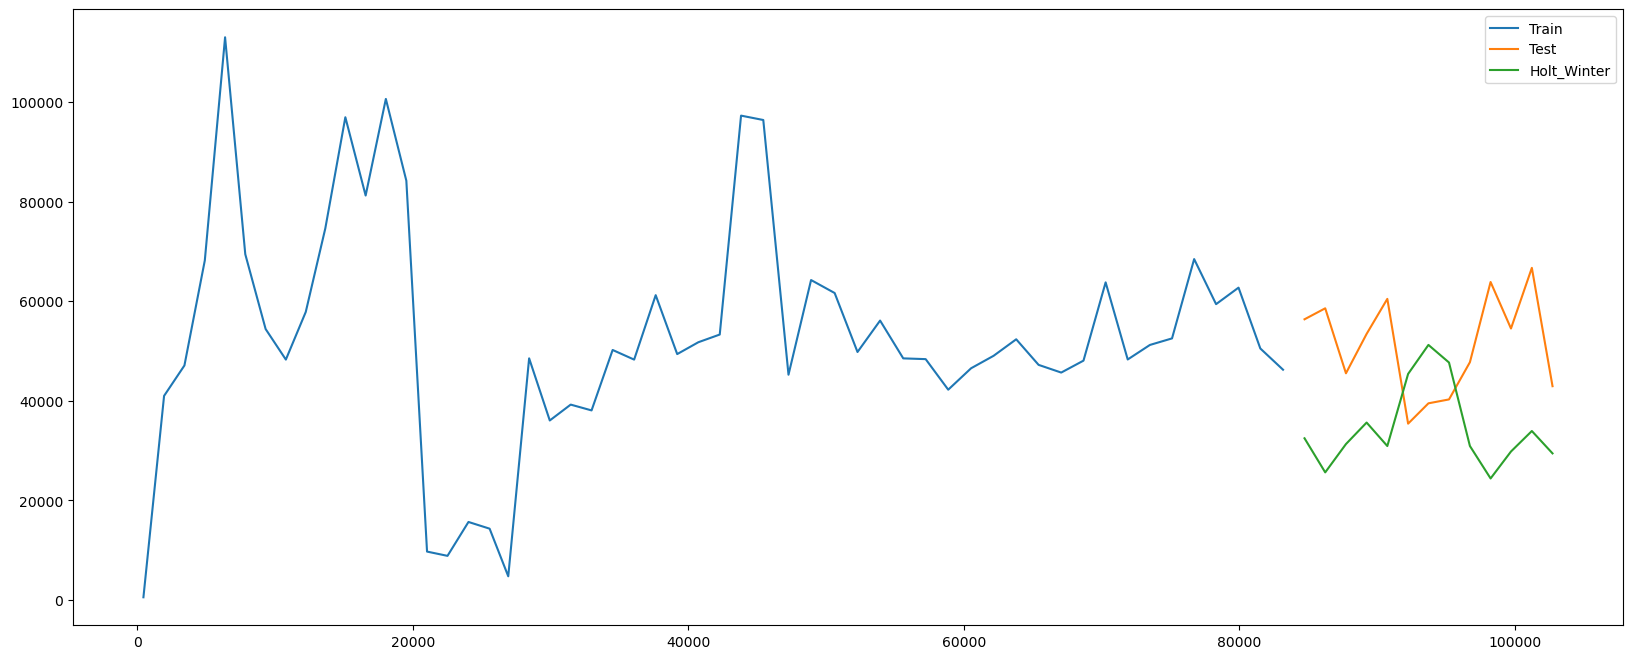

In [18]:
for i in range(len(name)):
    holtz_generator(name[i])

## RNN

### Feature engineering

In [48]:
train1=train.copy()
train1[['Tahun', 'Minggu']]= train1['week_number'].str.split('-', n=1, expand=True)
train1.drop(columns='week_number')
train1[['Tahun', 'Minggu','quantity']]=train1[['Tahun', 'Minggu','quantity']].astype(float)
test1=test.copy()
test1[['Tahun', 'Minggu']]= test1['week_number'].str.split('-', n=1, expand=True)
test1.drop(columns='week_number')
test1[['Tahun', 'Minggu','quantity']]=test1[['Tahun', 'Minggu','quantity']].astype(float)

In [60]:

X_train=train1[['Tahun', 'Minggu']]
y_train=train1['quantity']
X_test=test1[['Tahun', 'Minggu']]
y_test=test1['quantity']
scaler= MinMaxScaler()
X_train[['Minggu']]=scaler.fit_transform(X_train[['Minggu']])
X_train['Minggu']= X_train['Tahun'] + X_train['Minggu']-2021
X_train=X_train.drop(columns='Tahun')
X_test[['Minggu']]=scaler.fit_transform(X_test[['Minggu']])
X_test['Minggu']= X_test['Tahun'] + X_test['Minggu']
X_test=X_test.drop(columns='Tahun')
X_train = X_train.values.reshape(X_train.shape[0], 1,1)
y_train = y_train.values.reshape(y_train.shape[0], 1,1)
X_test = X_test.values.reshape(X_test.shape[0], 1,1)
y_test = y_test.values.reshape(y_test.shape[0], 1,1)
X_train


array([[[1.        ]],

       [[1.        ]],

       [[1.01960784]],

       [[1.03921569]],

       [[1.05882353]],

       [[1.07843137]],

       [[1.09803922]],

       [[1.11764706]],

       [[1.1372549 ]],

       [[1.15686275]],

       [[1.17647059]],

       [[1.19607843]],

       [[1.21568627]],

       [[1.23529412]],

       [[1.25490196]],

       [[1.2745098 ]],

       [[1.29411765]],

       [[1.31372549]],

       [[1.33333333]],

       [[1.35294118]],

       [[1.37254902]],

       [[1.39215686]],

       [[1.41176471]],

       [[1.43137255]],

       [[1.45098039]],

       [[1.47058824]],

       [[1.49019608]],

       [[1.50980392]],

       [[1.52941176]],

       [[1.54901961]],

       [[1.56862745]],

       [[1.58823529]],

       [[1.60784314]],

       [[1.62745098]],

       [[1.64705882]],

       [[1.66666667]],

       [[1.68627451]],

       [[1.70588235]],

       [[1.7254902 ]],

       [[1.74509804]],

       [[1.76470588]],

       [[1.78431

In [62]:
# Define your TensorFlow model
model = Sequential()
model.add(LSTM(128,  return_sequences=True, input_shape=(1,1)))
model.add(Dense(1, activation="relu"))


# Compile the model
model.compile(optimizer='adam', loss='mae')

# Train the model
history = model.fit(X_train, y_train, epochs=5000, batch_size=16, validation_data=(X_test, y_test), verbose=1)

Epoch 1/5000
4/4 [==============================] - 4s 183ms/step - loss: 946687.6875 - val_loss: 943861.8125
Epoch 2/5000
4/4 [==============================] - 0s 16ms/step - loss: 946687.5625 - val_loss: 943861.5625
Epoch 3/5000
4/4 [==============================] - 0s 23ms/step - loss: 946687.5625 - val_loss: 943861.4375
Epoch 4/5000
4/4 [==============================] - 0s 23ms/step - loss: 946687.5000 - val_loss: 943861.3750
Epoch 5/5000
4/4 [==============================] - 0s 26ms/step - loss: 946687.3750 - val_loss: 943861.0000
Epoch 6/5000
4/4 [==============================] - 0s 15ms/step - loss: 946687.3750 - val_loss: 943860.6250
Epoch 7/5000
4/4 [==============================] - 0s 19ms/step - loss: 946687.3125 - val_loss: 943860.1875
Epoch 8/5000
4/4 [==============================] - 0s 19ms/step - loss: 946687.2500 - val_loss: 943859.8125
Epoch 9/5000
4/4 [==============================] - 0s 21ms/step - loss: 946687.1875 - val_loss: 943858.8750
Epoch 10/5000
4/4 

val loss that is mean average error is big and improvement after 5000 epoch is not significant

1/1 [==============================] - 0s 24ms/step


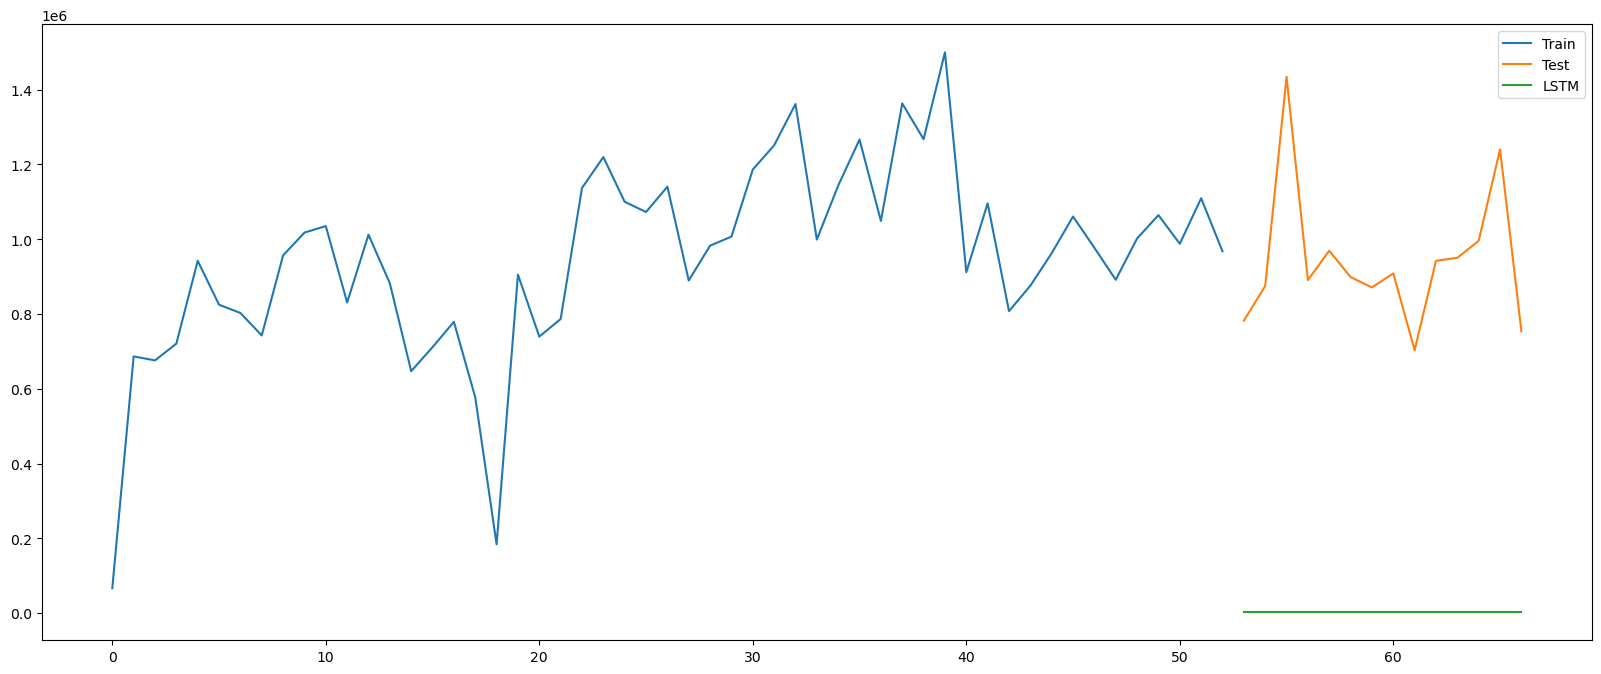

In [66]:
nam=model.predict(X_test)
nam=nam.reshape(14,)
y_hat_avg=test.copy()
y_hat_avg['LSTM'] = nam
plt.figure(figsize=(20,8))
plt.plot(train['quantity'], label='Train')
plt.plot(test['quantity'], label='Test')
plt.plot(y_hat_avg['LSTM'], label='LSTM')
plt.legend(loc='best')
plt.show()

From graph and the mse value above we can see that LSTM result is only static and have big error. so Holts Winter is the better model

# Conclusion

from this Experiment we can conclude that for this data, holtz winter is better predictor than LSTM model.